<a href="https://colab.research.google.com/github/Andy7204/ML-Model-Implementation/blob/main/Twitter_Disaster_Detection_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Twitter Disaster Detection using Natural Lanugage Processing
# Objective:
# This project aimed to develop a machine learning model to automatically identify tweets related to disasters
# from a dataset of Twitter messages. The goal was to create a system capable of distinguishing between tweets
# describing real disasters and those discussing non-emergency topics.

# Data Preprocessing:
# The project started with data loading using the Pandas library.
# Textual data preprocessing is a critical step. The raw text underwent tokenization and sequence padding using
# TensorFlow and Keras. The Tokenizer class was employed to convert the text into numerical sequences, and padding
# was applied to ensure uniform length for input into the neural network.

# Model Architecture:
# The core of the project involved designing a deep learning model using TensorFlow and Keras. The model
# architecture included an embedding layer, a global average pooling layer for dimensionality reduction, a dense
# hidden layer with ReLU activation, and a final output layer with sigmoid activation for binary classification.
# Dropout layers were added to mitigate overfitting and enhance model generalization.
# Callback for early stopping is also included to stop overfitting and take the best run.

# Hyperparameter Tuning:
# Hyperparameter tuning played a significant role in enhancing the model's performance. Grid Search can be implemented
# using scikit-learn's GridSearchCV for hyperparameter tuning. Various
# hyperparameters, including embedding dimensions and dropout rates, were systematically explored to
# identify the combination that yielded the best F1 score.

# Training and Evaluation:
# The dataset was split into training and validation sets using the train_test_split function.
# The model was trained on the training data and evaluated on the validation set. The F1 score, a metric
# balancing precision and recall, was utilized for evaluation, while BinaryCrossEntropy loss, Adam Optimizer,
# and Accuracy metric were used to compile the model.

# Outcome:
# The project resulted in a robust deep learning model capable of accurately identifying disaster-related tweets.
# It could reach an accuracy upto 81% with an F1 score of 0.77

# Conclusion:
# This project showcases the effectiveness of deep learning techniques in natural language processing tasks.
# By leveraging neural network architectures and optimizing hyperparameters, the developed model serves
# as a powerful tool for real-time disaster detection on social media platforms, offering valuable insights for
# emergency response and crisis management.

In [ ]:
import numpy as np
import pandas as pd # data processing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from tensorflow.keras.callbacks import EarlyStopping

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [ ]:
train_data.head(50)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


In [ ]:
embedding_dim = 10
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

In [ ]:
sentences = []
labels = []
for index, row in train_data.iterrows():
    sentences.append(row['text'])
    labels.append(row['target'])
X_train, X_val, y_train, y_val =  train_test_split(sentences,labels,test_size=0.3,stratify=labels)

In [ ]:
vocab_size= 2000
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(sentences)

train_seq = tokenizer.texts_to_sequences(X_train)
train_padded = pad_sequences(train_seq, maxlen =max_length, padding = padding_type, truncating=trunc_type)
testing_seq = tokenizer.texts_to_sequences(X_val)
test_padded = pad_sequences(testing_seq, maxlen =max_length, padding = padding_type, truncating=trunc_type)

In [ ]:
early_stopping = EarlyStopping(
    min_delta =0.01,
    patience = 10,
    restore_best_weights =True,
)
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24,activation = 'relu'),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1,activation = 'sigmoid')
])
model.compile(
    loss = 'binary_crossentropy',
    optimizer= 'adam',
    metrics = ['accuracy']
)

In [ ]:
train_padded = np.array(train_padded)
train_seq = np.array(train_seq)
train_labels = np.array(y_train)
testing_seq = np.array(testing_seq)
test_padded = np.array(test_padded)
y_train = np.array(y_train)
y_val = np.array(y_val)

C:\Users\Admin\AppData\Local\Temp\ipykernel_11388\576976177.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_seq = np.array(train_seq)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11388\576976177.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  testing_seq = np.array(testing_seq)


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 10)           20000     
                                                                 
 global_average_pooling1d_1  (None, 10)                0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_2 (Dense)             (None, 24)                264       
                                                                 
 dropout_1 (Dropout)         (None, 24)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 25        
                                                                 
Total params: 20289 (79.25 KB)
Trainable params: 20289 (79.25 KB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [ ]:
epoch = 100
history = model.fit(
    train_padded, y_train,
    epochs=epoch,
    batch_size=64,
    validation_data=(test_padded, y_val),
    verbose = 2,
    callbacks= [early_stopping],
)

Epoch 1/100
84/84 - 4s - loss: 0.6883 - accuracy: 0.5661 - val_loss: 0.6833 - val_accuracy: 0.5705 - 4s/epoch - 53ms/step
Epoch 2/100
84/84 - 0s - loss: 0.6806 - accuracy: 0.5703 - val_loss: 0.6789 - val_accuracy: 0.5705 - 323ms/epoch - 4ms/step
Epoch 3/100
84/84 - 0s - loss: 0.6766 - accuracy: 0.5703 - val_loss: 0.6710 - val_accuracy: 0.5705 - 288ms/epoch - 3ms/step
Epoch 4/100
84/84 - 0s - loss: 0.6641 - accuracy: 0.5735 - val_loss: 0.6533 - val_accuracy: 0.5946 - 328ms/epoch - 4ms/step
Epoch 5/100
84/84 - 0s - loss: 0.6389 - accuracy: 0.6538 - val_loss: 0.6190 - val_accuracy: 0.6961 - 328ms/epoch - 4ms/step
Epoch 6/100
84/84 - 0s - loss: 0.5988 - accuracy: 0.7305 - val_loss: 0.5755 - val_accuracy: 0.7447 - 338ms/epoch - 4ms/step
Epoch 7/100
84/84 - 0s - loss: 0.5558 - accuracy: 0.7523 - val_loss: 0.5382 - val_accuracy: 0.7671 - 326ms/epoch - 4ms/step
Epoch 8/100
84/84 - 0s - loss: 0.5200 - accuracy: 0.7711 - val_loss: 0.5082 - val_accuracy: 0.7767 - 292ms/epoch - 3ms/step
Epoch 9/10

In [ ]:
test_predictions= model.predict(test_padded)
test_predictions_binary = (test_predictions>0.5).astype(int)
f1 = f1_score(y_val,test_predictions_binary)
print(f1)


72/72 [==============================] - 0s 3ms/step
0.7715068493150684


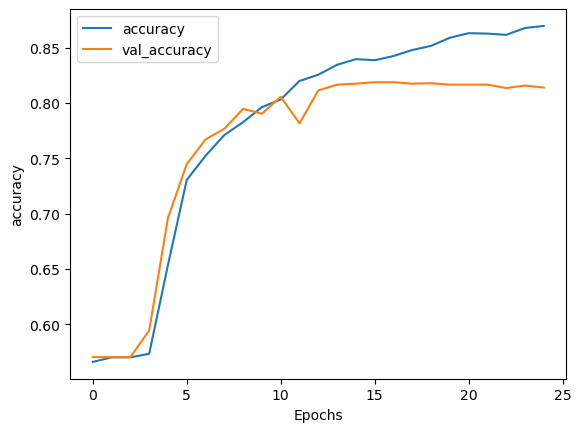

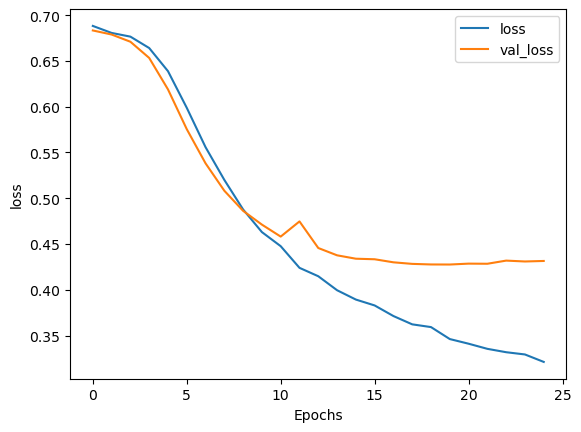

In [ ]:
import matplotlib.pyplot as plt
def plot_graphs(history,string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string,'val_'+string])
    plt.show()
plot_graphs(history,"accuracy")
plot_graphs(history,"loss")